# Project 2020 - Fundamentals of Data Analysis

---

### Project requirements:

Perform and explain simple linear regression using Python on the **powerproduction** dataset.
The goal is to;
- accurately predict wind turbine power output from wind speed values using the data set as a basis.
 1. using simple linear regression on the data set.
 2. In that notebook, an explanation of your regression and an analysis of its accuracy.

#### Methodology:

* Importing the data set
* Explore the data set
* Perform Analysis


To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

In [1]:
#

%matplotlib inline

# importing required packages and libraries
import numpy as np
rng = np.random.default_rng()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)
# Nicer colours and styles for plots.
# plt.style.use("ggplot")
plt.style.use("fivethirtyeight")

In [2]:
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df = pd.read_csv(url, error_bad_lines=False)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
# transpose the data set
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [4]:
# validating the data set
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


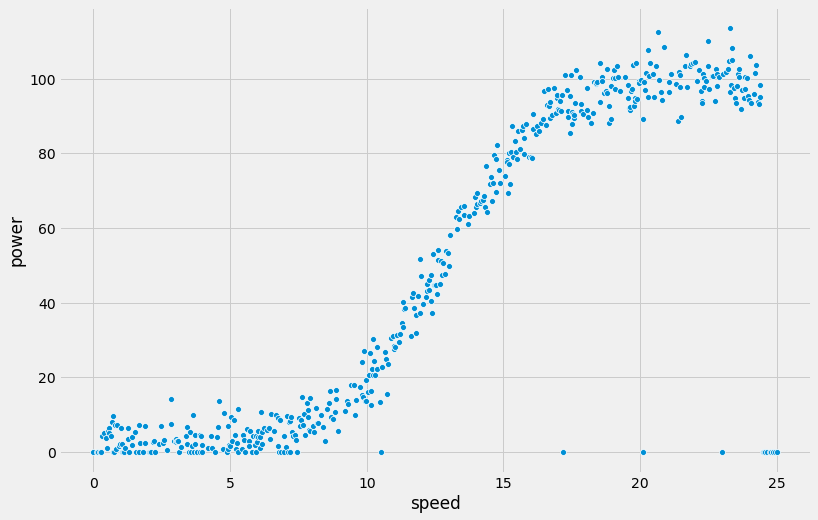

In [5]:
sns.scatterplot(data = df, x = "speed", y = "power")

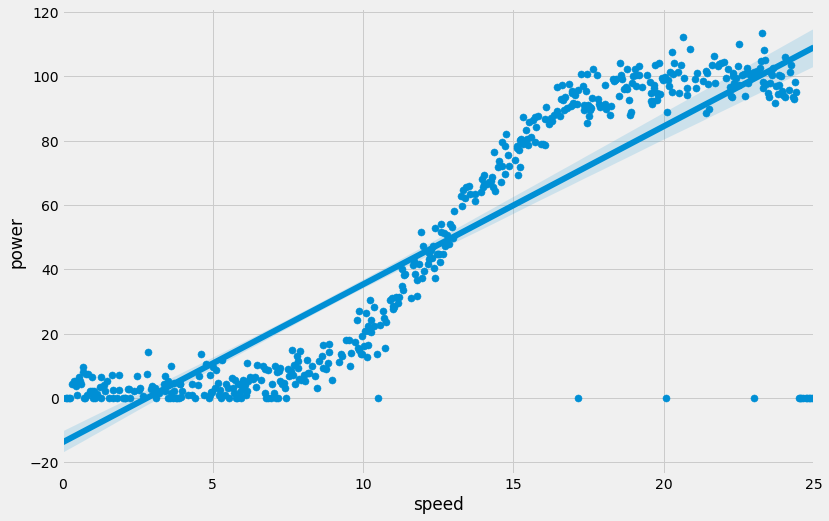

In [6]:
# simple linear regression by using seaborn [1]
sns.regplot(x = "speed", y = "power", data = df, x_estimator=np.mean)


## Using scikit-learn for prediction
---

In [7]:
def f(x, p):
    return p[0] + x * p[1]

### Train
---

In [8]:
# using linear_model : https://scikit-learn.org/stable/modules/linear_model.html 
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb 
# pda : Notebook: Models

import sklearn.linear_model as lin

x = df["speed"].to_numpy()
y = df["power"].to_numpy()

x = x.reshape(-1, 1)

# assigning the type of regression
model = lin.LinearRegression()
model.fit(x, y)

# regression
r = model.score(x, y)

# training model
p = [model.intercept_, model.coef_[0]]

In [9]:
r

0.7289360258564073

In [10]:
p

[-13.899902630519634, 4.9175956654046695]

### predict
---

In [11]:
# linear regression function

def predict(x):
    return f(x, p)

In [12]:
# f(x, p)

array([[-1.38999026e+01],
       [-1.32852032e+01],
       [-1.31622633e+01],
       [-1.27934436e+01],
       [-1.25475638e+01],
       [-1.23016840e+01],
       [-1.19328644e+01],
       [-1.16869846e+01],
       [-1.14361872e+01],
       [-1.13132473e+01],
       [-1.11903074e+01],
       [-1.10673675e+01],
       [-1.08214877e+01],
       [-1.05756080e+01],
       [-1.04526681e+01],
       [-1.03297282e+01],
       [-1.02067883e+01],
       [-9.96090850e+00],
       [-9.83796861e+00],
       [-9.71502872e+00],
       [-9.34620904e+00],
       [-9.22326915e+00],
       [-9.10032926e+00],
       [-8.97738937e+00],
       [-8.85444948e+00],
       [-8.73150959e+00],
       [-8.60856969e+00],
       [-8.48562980e+00],
       [-8.23975002e+00],
       [-7.74799045e+00],
       [-7.62505056e+00],
       [-7.50211067e+00],
       [-7.01035110e+00],
       [-6.88741121e+00],
       [-6.51367394e+00],
       [-6.26779416e+00],
       [-5.77603459e+00],
       [-5.65309470e+00],
       [-5.5

In [17]:
# predict(x)

TypeError: predict() missing 1 required positional argument: 'x'

In [14]:
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/knn-iris.ipynb
# Machine learning (sklearn) 
# pda

import sklearn.neighbors as nei
import sklearn.model_selection as mod
inputs = df["speed"].to_numpy()
outputs = df["power"].to_numpy()

inputs = inputs.reshape(-1, 1)

### Classifier

In [15]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

### Fit

In [16]:
knn.fit(inputs, outputs)


ValueError: Unknown label type: 'continuous'

### Predict

In [ ]:
df.loc[5]

In [ ]:
knn.predict(0.325)

### Evaluate

In [ ]:
(knn.predict(inputs) == outputs).sum()

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

In [ ]:
(knn.predict(inputs_test) == outputs_test).sum()

## References

[1] Functions to draw linear regression models ; https://seaborn.pydata.org/tutorial/regression.html#functions-to-draw-linear-regression-models

[2] Ian McLoughlin; Models : https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb

[]

[]

[]

[]

[]